In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'C:\Users\13472\Documents\05-2023 Instacart Basket Analysis- UE'

In [3]:
# Importing orders_products_all.pkl

df = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
df.shape

(32404859, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int64  
 1   user_id                        object 
 2   order_number                   int64  
 3   orders_day_of_week             int64  
 4   orders_hod                     int64  
 5   days_since_prior_order         float64
 6   product_id                     int64  
 7   add_to_cart_order              int64  
 8   reordered                      int64  
 9   product_name                   object 
 10  aisle_id                       int64  
 11  department_id                  int64  
 12  prices                         float64
 13  price_range_loc                object 
 14  busiest_day                    object 
 15  busiest_days                   object 
 16  busiest_period_of_day          object 
 17  max_order                      int64  
 18  

In [6]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hod,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# Step 3

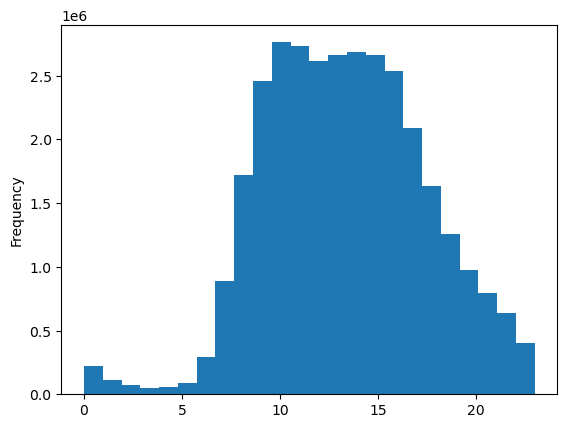

In [7]:
# Creating a histogram of the 'orders_hod' column with 24 bins

busy_hour_hist = df['orders_hod'].plot.hist(bins = 24)

This histogram depicts the time of day that customers are more likely to place orders. As you can see in the visualization, the most amount of orders are placed between the times 9am-5pm. With 10am and 11am being its peak hours. 

# Step 4

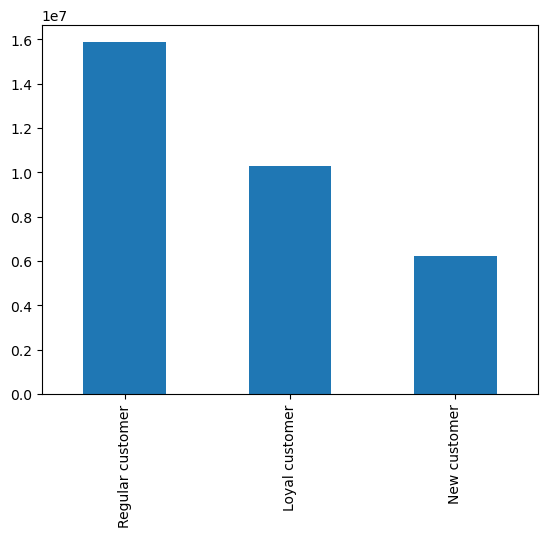

In [8]:
# Creating a bar chart

loyalty_bar = df['loyalty_flag'].value_counts().plot.bar()

# Step 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [9]:
#creating line chart
#creating a list holding true/false valuesto the test np.random.rand()<=0.7
np.random.seed(4)
dev=np.random.rand(len(df))<=0.7

In [10]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [11]:
df_big = df[dev]

In [12]:
df_small = df[~dev]

In [13]:
len(df)

32404859

In [14]:
len(df_big)+len(df_small)

32404859

In [16]:
df_2 =df_small[['orders_hod','prices']]

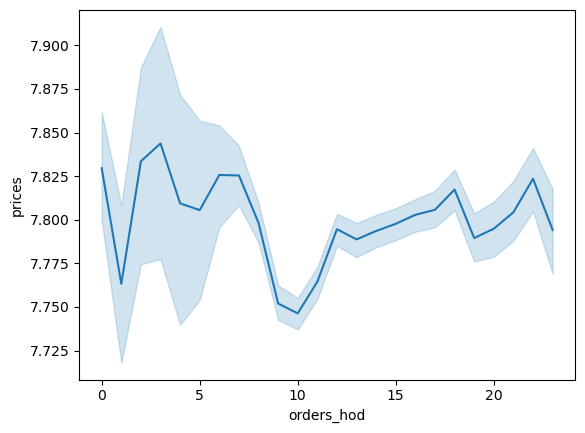

In [17]:
price_v_hour_line = sns.lineplot(data = df_2, x = 'orders_hod',y = 'prices')

# Step 6

In [18]:
# Reducing df_small 

df_3 = df_small[['age','number_of_dependants']]

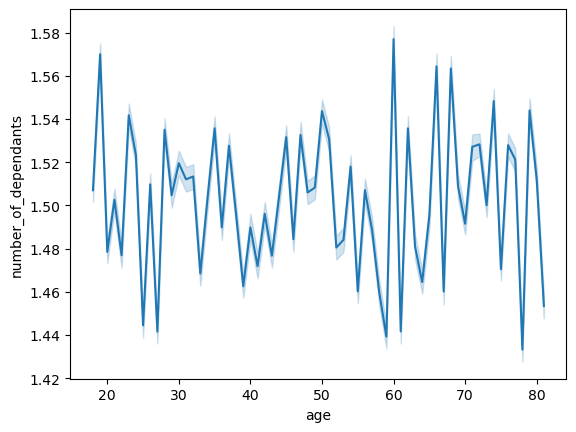

In [19]:
# Making the line chart

age_v_dependents_line = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependants')

Throughout the ages of 20 and 80 the number of dependants is constantly fluctuating. but it is at its highest at the age of 60.

# Step 7

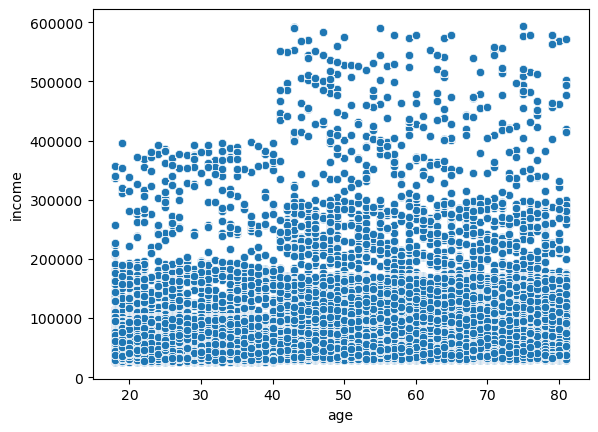

In [20]:
# Creating a scatterplot of 'income' and'age'

income_v_age_scatter = sns.scatterplot(x = 'age', y = 'income',data = df)

The graph shows a big jump once the age hits 40. During the age of 40-80 most people earn an income between 200000 and 300000.

# Step 8

In [22]:
# Exporting busy_hour_hist
busy_hour_hist.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'busy_hour_hist.png'))

In [23]:
# Exporting busy_hour_hist
loyalty_bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'loyalty_bar.png'))

In [24]:
# Exporting price_v_hour_line
price_v_hour_line.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'price_v_hour_line.png'))

In [26]:
# Exporting income_v_age_scatter
income_v_age_scatter.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'income_v_age_scatter.png'))